## 학습목표
- 데이터분석 프로세스를 이해할 수 있다
- Pandas의 기본 사용법을 익히고 활용할 수 있다

### 1. 데이터분석 프로세스

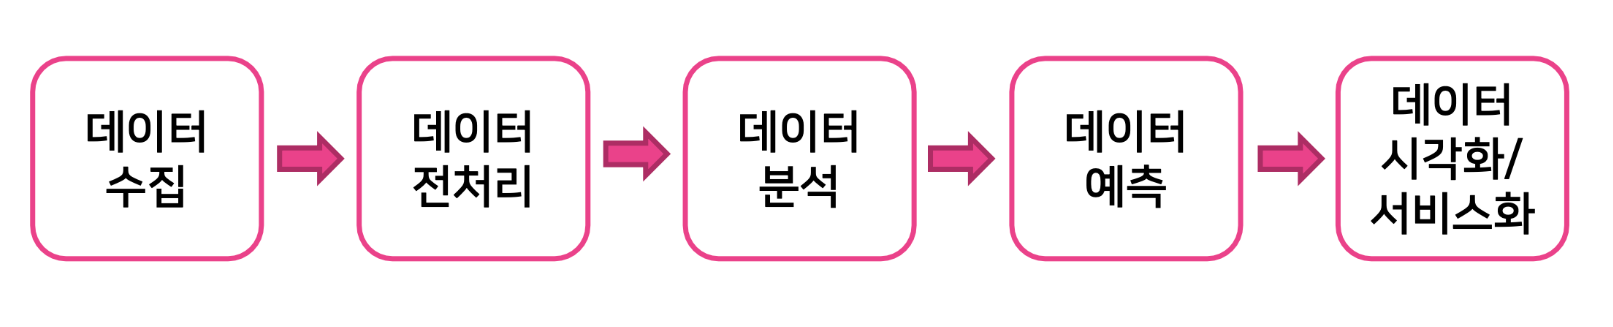

### 2. Pandas 구조 이해하기
- Series Class : 1차원 데이터
- DataFrame Class : 2차원 데이터

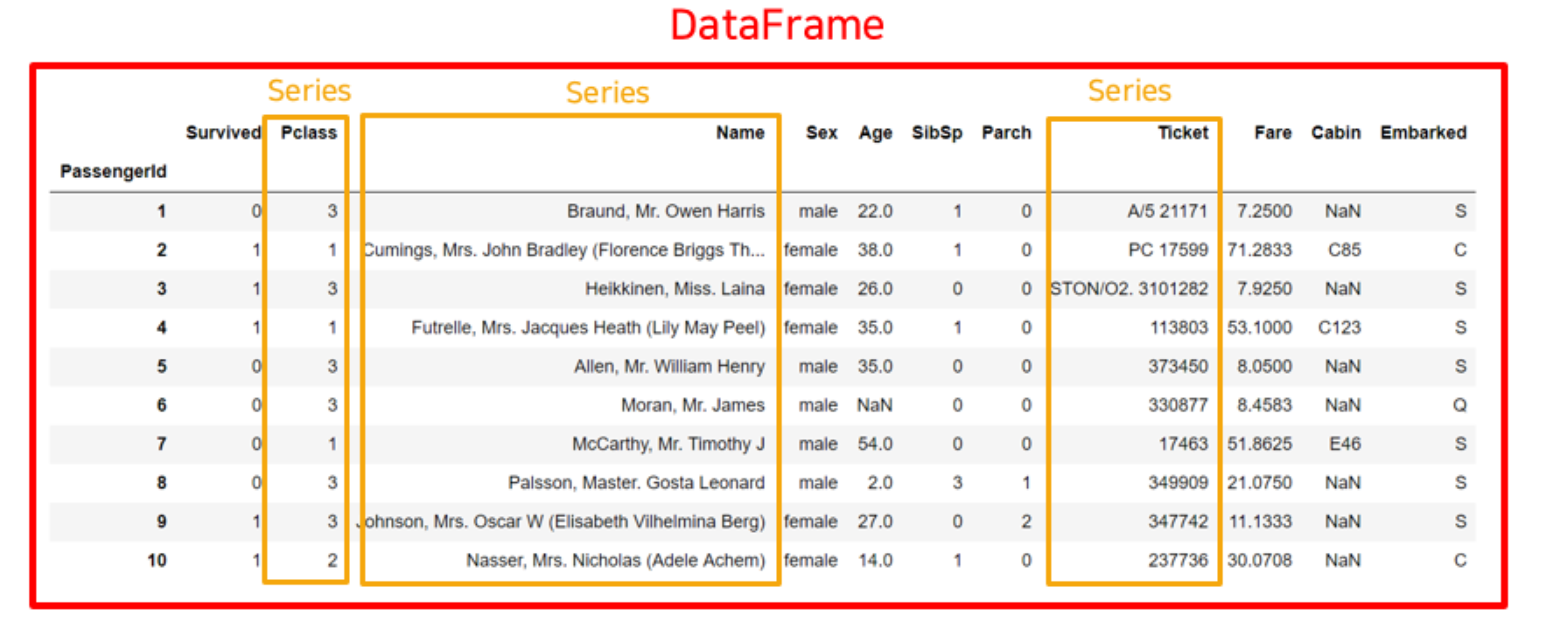

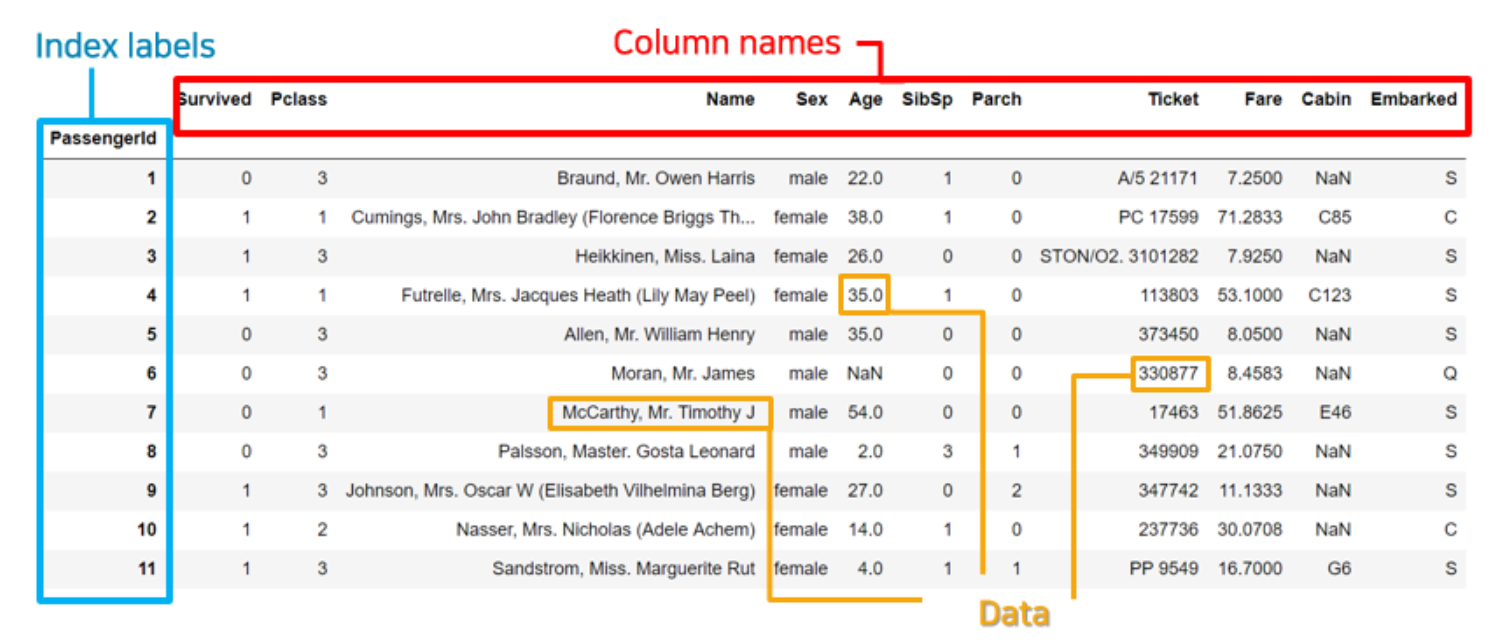

#### Series 생성

In [3]:
# !pip install pandas
import pandas as pd

In [12]:
team_name = pd.Series(['aaa', 'bbb', 'ccc', 'ddd'])   # 객체 생성, pandas 패키지 안의 클래스가 정의
team_name  # 데이터 타입이 object / 추상적인 개념이다. 모든 것을 다 object로 표현할 수 있다 

0    aaa
1    bbb
2    ccc
3    ddd
dtype: object

In [15]:
team_name.astype("string") # 문자열로 변환
# int8, int16, float32, float64  --bit

0    aaa
1    bbb
2    ccc
3    ddd
dtype: string

In [18]:
team_MBTI = pd.Series(['ENFJ', 'ISTP', 'ENFP', 'ISTJ'], 
                     index=['001', '002', '003', '004'])  # 행 인덱스 지정
team_MBTI

001    ENFJ
002    ISTP
003    ENFP
004    ISTJ
dtype: object

#### DataFrame 생성

In [21]:
team_info = pd.DataFrame([['aaa', 'ENFJ'], # 2차원 배열
                         ['bbb', 'ISTP'],
                         ['ccc', 'ENFP'],
                         ['ddd', 'ISTJ']],
                        index=['001', '002', '003', '004'],  # 행 인덱스
                        columns=['이름', 'MBTI'])   # 열 인덱스
team_info

,이름,MBTI
001,aaa,ENFJ
002,bbb,ISTP
003,ccc,ENFP
004,ddd,ISTJ


#### 데이터프레임 transpose

In [23]:
team_info.T   # 행, 열 전환

,001,002,003,004
이름,aaa,bbb,ccc,ddd
MBTI,ENFJ,ISTP,ENFP,ISTJ


#### index, column, value, size, dtype

In [29]:
# Series
print(team_MBTI.index)  # index값만 추출
print(team_MBTI.values)  # valeus
print(team_MBTI.size)  # 요소의 개수
print(team_MBTI.dtype)

Index(['001', '002', '003', '004'], dtype='object')
['ENFJ' 'ISTP' 'ENFP' 'ISTJ']
4
object


In [34]:
# DataFrame
print(team_info.index)  # 행 인덱스
print(team_info.columns)  # 열 인덱스
print(team_info.values)
print(team_info.size)  # item의 개수 / 4*2 = 8
print(team_info.dtypes)  # 각 열의 data type

Index(['001', '002', '003', '004'], dtype='object')
Index(['이름', 'MBTI'], dtype='object')
[['aaa' 'ENFJ']
 ['bbb' 'ISTP']
 ['ccc' 'ENFP']
 ['ddd' 'ISTJ']]
8
이름      object
MBTI    object
dtype: object


#### 팀 활동 : 이름, 좋아하는 음식, 나이, 어제 저녁에 한 일을 모아보자

In [35]:
other_team_info = pd.DataFrame([['김민성', '족발', 28, "커핑(커피 맛보기)"], # 2차원 배열
                         ['김하겸', '고기', 25, '커넥션 시청'],
                         ['송정민', '빵', 28, '넷플릭스 다큐 시청']],
                        index=['001', '002', '003'],  # 행 인덱스
                        columns=['이름', '좋아하는 음식', '나이', '어제 저녁에 한 일'])   # 열 인덱스
other_team_info

,이름,좋아하는 음식,나이,어제 저녁에 한 일
001,김민성,족발,28,커핑(커피 맛보기)
002,김하겸,고기,25,커넥션 시청
003,송정민,빵,28,넷플릭스 다큐 시청


### 3. 데이터 로딩
- CSV, XML, JSON, pickle, excel 등 다양한 형태를 읽을 수 있다.

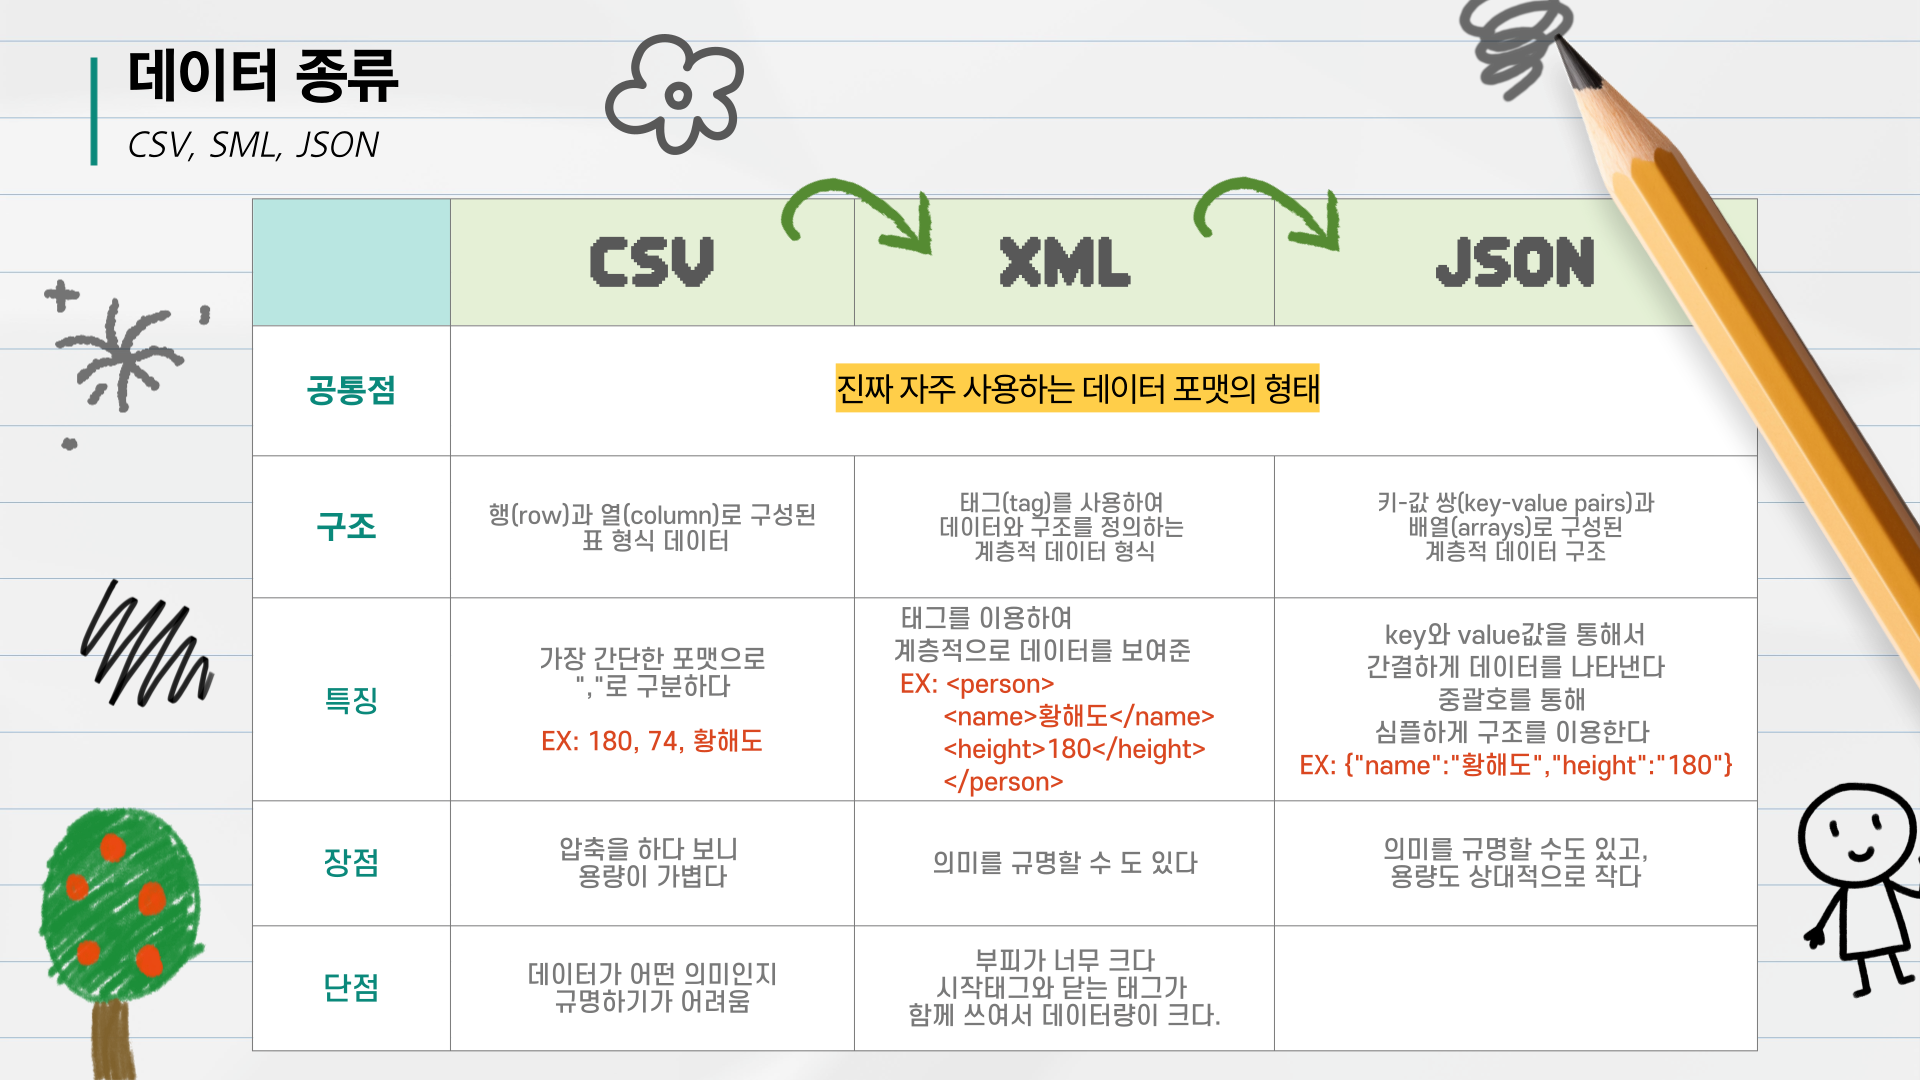

#### 디렉토리 구조 이해하기
- 절대경로 : C:\Users\dxsch\데이터분석\ex01_Pandas 기초.ipynb
- 상대경로 : .\ex01_Pandas 기초.ipynb  # 현재 작업 디렉토리
- .. : 상위 폴더를 지칭하는 표기법 -> ../python/ex00_주피터노트북 연습.ipynb

In [36]:
# 운영체제의 정보를 가져오거나 액션을 취하는 모듈 / 폴더 생성, 삭제, 이동, 파일명 변
import os

##### 현재 작업 디렉토리 확인하기

In [56]:
print(os.getcwd())

C:\Users\dxsch\데이터분석


##### 특정 디렉토리 내부 확인하기

In [57]:
print(os.listdir())

['.ipynb_checkpoints', 'data', 'ex01_Pandas 기초.ipynb']


##### 작업 디렉토리 변경하기

In [58]:
os.chdir("./data")  # 현재 디렉토리를 data 폴더로 변경하겠다.

In [59]:
print(os.getcwd())

C:\Users\dxsch\데이터분석\data


In [64]:
print(os.listdir(os.getcwd()))

['hr-info.csv']


#### 데이터 로딩 : read_cv

In [63]:
# 상대 경로 활용, 인코딩 필요 
hr_info = pd.read_csv("./hr-info.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 212: invalid start byte

#### 데이터로딩 with 인코딩 추측

In [65]:
import chardet

In [68]:
# 파일을 열어서 읽어 들인다/ read binary
with open("./hr-info.csv", "rb") as f:
    data = f.read()

In [69]:
chardet.detect(data)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [71]:
hr_info = pd.read_csv("./hr-info.csv", encoding="EUC-KR")
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


#### 특정 열을 인덱스로 설정하여 데이터 로드

In [73]:
hr_info = pd.read_csv("./hr-info.csv", encoding="EUC-KR", index_col="EID")  # 인덱스로 사용할 column 지정 / 열 수가 하나 빠진다 
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


#### 데이터 정보 확인하기

In [75]:
hr_info.info()  # 결측치 확인 가능 200 - 누락 없다 / 그 이하 - 누락 발생

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [76]:
# 행/열 크기 확인
hr_info.shape

(200, 19)

In [78]:
# 상위 N행 확인하기
hr_info.head(10)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,2024-03-01,0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y


In [79]:
# 하위 N행 확인하기
hr_info.tail(7)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00248,말만양,M,ORG017,P009,23,0,학사 학위,0.0,4500,NaN,4,"Project Management, Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00250,비식백,M,ORG019,P009,23,0,학사 학위,0.0,4500,NaN,4,"Project Management, Python",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 4. 데이터 색인(기초)
- 원하는 데이터 추출

#### 열 색인

In [81]:
# 열 한개 가져오기
hr_info["ENAME"]

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [83]:
# 열 여러개 가져오기
hr_info[["ENAME", "AGE"]

,ENAME,AGE
EID,,
E00206,시이오,49
E00181,나사장,49
E00164,난부사장,48
E00190,판라다,47
E00209,누훈봉,47
...,...,...
E00322,부탐회,23
E00389,초두반,23
E00438,권개득,23


In [84]:
# 열 한개를 가져오는데 DataFrame의 형식을 유지
hr_info["ENAME"]

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

#### 행 색인 -> 슬라이싱

In [88]:
# 숫자 인덱스 활용
hr_info[:5]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [87]:
# 글자 인덱스 활용 / 끝 부분 포함한 데이터 가져온다
hr_info["E00206":"E00164"]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


### 5. 데이터 연산

#### 데이터와 Series 연산

In [90]:
# 산술연산
hr_info['SALARY'] / 12  # 요소별 연산 지원 

EID
E00206    850.000000
E00181    791.666667
E00164    758.333333
E00190    708.333333
E00209    716.666667
             ...    
E00322    375.000000
E00389    375.000000
E00438    375.000000
E00304    375.000000
E00428    375.000000
Name: SALARY, Length: 200, dtype: float64

In [92]:
# 비교연산
hr_info['SALARY'] >= 5000  # 연봉 5000이상인지 비교

EID
E00206     True
E00181     True
E00164     True
E00190     True
E00209     True
          ...  
E00322    False
E00389    False
E00438    False
E00304    False
E00428    False
Name: SALARY, Length: 200, dtype: bool

#### Series 간 연산
- 같은 인덱스를 가지는 데이터끼리 연산을 진행
- 만약 같은 인덱스가 없다면 결측지 갑승로 표현 = NaN(not a Number)

In [142]:
# 직원들이 몇 살에 입사했는지 알아보자
hr_info["AGE"] - hr_info["SERVICE_YEAR"]

EID
E00206    0
E00181    0
E00164    0
E00190    0
E00209    0
         ..
E00322    0
E00389    0
E00438    0
E00304    0
E00428    0
Length: 200, dtype: int64

#### 문자열 연산
- Series.str.함수명

In [93]:
hr_info["EDU_LEVEL"].str.replace("학위", "")

EID
E00206    박사 
E00181    박사 
E00164    박사 
E00190    박사 
E00209    박사 
         ... 
E00322    학사 
E00389    학사 
E00438    학사 
E00304    학사 
E00428    학사 
Name: EDU_LEVEL, Length: 200, dtype: object

In [97]:
# 오리지널 데이터는 변경되지 않음
# 연산 결과를 반영하려면 대입연산자 활용
hr_info["EDU_LEVEL"] = hr_info["EDU_LEVEL"].str.replace("학위", "")

In [98]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 연습문제

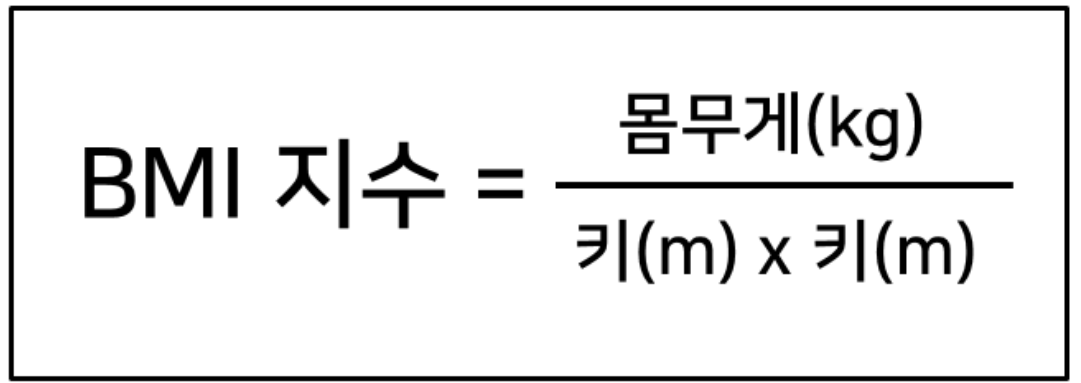

In [182]:
# 파일을 열어서 읽어 들인다/ read binary
with open("./육군신체측정정보.csv", "rb") as f:
    data = f.read()

In [183]:
chardet.detect(data)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [186]:
body_info = pd.read_csv("./육군신체측정정보.csv", encoding="utf-8")
body_info.head()

C:\Users\dxsch\AppData\Local\Temp\ipykernel_20236\428160533.py:1: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  body_info = pd.read_csv("./육군신체측정정보.csv", encoding="utf-8")


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg


In [187]:
body_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167983 non-null  int64 
 1   측정 일자       167983 non-null  int64 
 2   가슴 둘레 센티미터  167982 non-null  object
 3   소매길이 센티미터   167983 non-null  object
 4   신장 센티미터     167983 non-null  object
 5   허리 둘레 센티미터  167983 non-null  object
 6   샅높이 센티미터    167983 non-null  object
 7   머리 둘레 센티미터  167981 non-null  object
 8   발 길이 센티미터   167983 non-null  object
 9   몸무게 킬로그램    167983 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.8+ MB


In [176]:
# body_info.astype("float64")

# 형변환
body_info['신장 센티미터'] = body_info['신장 센티미터'].str.replace(' cm', '')  # ' cm' 문자열 제거
body_info['몸무게 킬로그램'] = body_info['몸무게 킬로그램'].str.replace(' kg', '')  # ' kg' 문자열 제거

# 숫자형으로 변환
body_info['신장 센티미터'] = pd.to_numeric(body_info['신장 센티미터'], errors='coerce')  # 숫자형으로 변환
body_info['몸무게 킬로그램'] = pd.to_numeric(body_info['몸무게 킬로그램'], errors='coerce')  # 숫자형으로 변환


# body_info.astype({'신장 센티미터': 'float'})
# body_info.astype({'몸무게 킬로그램': 'float'})

body_info.dtypes


순번              int64
측정 일자           int64
가슴 둘레 센티미터     object
소매길이 센티미터      object
신장 센티미터       float64
허리 둘레 센티미터     object
샅높이 센티미터       object
머리 둘레 센티미터     object
발 길이 센티미터      object
몸무게 킬로그램      float64
dtype: object

In [177]:
body_info["BMI"] = body_info["몸무게 킬로그램"] / (body_info["신장 센티미터"] /100) ** 2
# body_info["신장 센티미터"]
# hr_info['SALARY'] / 1
body_info["BMI"]

0         21.272731
1         23.286726
2         28.797420
3         24.372012
4         21.442077
            ...    
167978    24.568108
167979    25.564359
167980    25.639322
167981    19.046380
167982    16.728338
Name: BMI, Length: 167983, dtype: float64

#### 답

In [188]:
h = body_info["신장 센티미터"]
h

0         185.5 cm
1         167.2 cm
2         179.9 cm
3         171.4 cm
4         176.9 cm
            ...   
167978    173.2 cm
167979    166.3 cm
167980    175.2 cm
167981    173.6 cm
167982    175.8 cm
Name: 신장 센티미터, Length: 167983, dtype: object

In [189]:
w = body_info['몸무게 킬로그램']
w

0         73.2 kg
1         65.1 kg
2         93.2 kg
3         71.6 kg
4         67.1 kg
           ...   
167978    73.7 kg
167979    70.7 kg
167980    78.7 kg
167981    57.4 kg
167982    51.7 kg
Name: 몸무게 킬로그램, Length: 167983, dtype: object

In [190]:
# 단위제거
h = h.str.replace(" cm", "")
w = w.str.replace(" kg", "")

In [191]:
h

0         185.5
1         167.2
2         179.9
3         171.4
4         176.9
          ...  
167978    173.2
167979    166.3
167980    175.2
167981    173.6
167982    175.8
Name: 신장 센티미터, Length: 167983, dtype: object

In [193]:
# 수치형으로 데이터 타입 변경
h = h.astype("float32")
w = w.astype("float32")

In [196]:
BMI = w / (h/100) ** 2

In [195]:
BMI

0         39.460915
1         38.935406
2         51.806561
3         41.773628
4         37.931034
            ...    
167978    42.551960
167979    42.513527
167980    44.920090
167981    33.064514
167982    29.408419
Length: 167983, dtype: float32

### 6. 데이터 색인(응용)

#### Boolean 색인
- 위치 기반이 아닌 조건을 중심으로 데이터를 색인하는 기법

In [198]:
li = [True] * 10 + [False] * 190
li

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [199]:
hr_info[li]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,25,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,24,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00242,규모사,M,ORG027,P004,18,18,학사,2.22,8300,2024-03-01,0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,19,19,석사,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,20,20,석사,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00169,제언로,M,ORG004,P004,20,20,학사,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y


In [201]:
tf = hr_info['SALARY'] >= 5000
hr_info[tf]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,25,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,24,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00460,춘란시,M,ORG023,P008,0,0,학사,0.00,5000,2024-03-01,4,"Data Analysis, Python",N,2024-03-01,2024-05-01,이직,N,KOREA,N
E00468,다덕출,F,ORG028,P008,0,0,학사,0.00,5000,2024-03-01,4,"Java, Project Management, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00469,리모루,M,ORG014,P008,0,0,학사,0.00,5000,2024-03-01,4,Project Management,Y,2024-03-01,NaN,NaN,NaN,India,N


In [203]:
# 성별이 여성인 사람만 boolean 색인 해보기
# 데이터프레임[조건식]
hr_info[hr_info['GENDER'] == 'F']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,24,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,19,19,석사,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,20,20,석사,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00294,중우방,F,ORG021,P004,19,19,박사,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00382,망팽단,F,ORG026,P009,0,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00189,초옥덕,F,ORG020,P009,0,0,학사,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00322,부탐회,F,ORG014,P009,0,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


#### loc/iloc 인덱서
- 문법적으로 명확하다
- 속도는 애매하다
- df.iloc[행, 열] : 숫자 인덱스 활용
- df.loc[행, 열] : 글자 인덱스 활용 

In [204]:
hr_info.iloc[:, 2]

EID
E00206       NaN
E00181       NaN
E00164       NaN
E00190    ORG007
E00209    ORG023
           ...  
E00322    ORG014
E00389    ORG012
E00438    ORG024
E00304    ORG009
E00428    ORG003
Name: ORG_CD, Length: 200, dtype: object

In [205]:
hr_info.iloc[:5, 2:4]

,ORG_CD,POS_CD
EID,,
E00206,NaN,P001
E00181,NaN,P002
E00164,NaN,P003
E00190,ORG007,P004
E00209,ORG023,P004


In [206]:
hr_info.loc["E00206":"E00164", "AGE"]

EID
E00206    25
E00181    24
E00164    22
Name: AGE, dtype: int64

In [208]:
hr_info.loc["E00206":"E00164", "AGE":"EDU_LEVEL"]

,AGE,SERVICE_YEAR,EDU_LEVEL
EID,,,
E00206,25,25,박사
E00181,24,24,박사
E00164,22,22,박사


In [211]:
# boolean 색인을 이용해서 Loc 인덱서 활용하기
# 30살 미만의 직원들의 연봉과 근속년수를 알아보자
hr_info.loc[hr_info["AGE"] < 30, ["SALARY", "SERVICE_YEAR"]]

,SALARY,SERVICE_YEAR
EID,,
E00206,10200,25
E00181,9500,24
E00164,9100,22
E00190,8500,18
E00209,8600,19
...,...,...
E00322,4500,0
E00389,4500,0
E00438,4500,0


### 7. 데이터 추가(행/열)

#### 열(컬럼) 추가
- df['컬럼명'] = 데이터(Series/list 등)

In [217]:
# 연봉정보를 이용해 월급여를 컬럼으로 만들어보자(파생변수)
hr_info['MONTHLY PAY'] = (hr_info['SALARY'] / 12).round(1)
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,25,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,24,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,0,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,0,0,학사,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,0,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


#### 열(컬럼) 삽입
- df.insert(loc=인덱스, column=컬럼명, value=데이터)

In [218]:
# 일급여 컬럼 삽입
hr_info.insert(loc= 8, column="DALIY PAY", value=hr_info['MONTHLY PAY'] /30)
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DALIY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,25,25,박사,4.50,28.333333,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,24,24,박사,4.60,26.390000,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,25.276667,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,23.610000,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,23.890000,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,0,0,학사,0.00,12.500000,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,0,0,학사,0.00,12.500000,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,0,0,학사,0.00,12.500000,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


#### 행 추가
- df.loc['인덱스'] = 데이터

In [219]:
hr_info.columns

Index(['ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'DALIY PAY', 'SALARY',
       'LAST_PROMO_DT', 'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE',
       'HIRE_DATE', 'RETIRE_DATE', 'RETIRE_REASON', 'REHIRE_YN', 'NATION',
       'ROUNDING_DEDUCTION', 'MONTHLY PAY'],
      dtype='object')

In [220]:
import numpy as np

In [221]:
hr_info.loc['E99999'] = ["홍길동", "남", "ORG008", "P009", 20, 0, "박사", 0, 100, 10000, 
                         np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]

In [222]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DALIY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,25,25,박사,4.50,28.333333,10200,...,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,24,24,박사,4.60,26.390000,9500,...,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,25.276667,9100,...,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,23.610000,8500,...,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,23.890000,8600,...,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00389,초두반,F,ORG012,P009,0,0,학사,0.00,12.500000,4500,...,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,0,0,학사,0.00,12.500000,4500,...,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00304,탐출조,M,ORG009,P009,0,0,학사,0.00,12.500000,4500,...,4.0,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


#### 연습문제
- input 함수를 이용해 스킬을 입력받고 해당하는 스킬을 보유한 직원정보 검색
- 입력형태 : Java, Python, Marketing
- 출력형태 : Java를 할 수 있는 인력 or Python을 할 수 있는 인력 or Marketing을 할 수 있는 인력

In [235]:
skill_lst = input("검색할 스킬을 입력하세요").split(',')
print(skill_lst)
skills_condition = '|'.join(skill_lst)
print(skills_condition)
hr_info.loc[hr_info["SKILLS"].str.contains(skills_condition, case=False, na=False)]

검색할 스킬을 입력하세요 Java, Python, Marketing


['Java', ' Python', ' Marketing']
Java| Python| Marketing


,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DALIY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,24,24,박사,4.60,26.390000,9500,...,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,22,22,박사,4.60,25.276667,9100,...,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,18,18,박사,3.51,23.610000,8500,...,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,19,19,박사,3.38,23.890000,8600,...,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
E00242,규모사,M,ORG027,P004,18,18,학사,2.22,23.056667,8300,...,0.0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,691.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00248,말만양,M,ORG017,P009,0,0,학사,0.00,12.500000,4500,...,4.0,"Project Management, Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00250,비식백,M,ORG019,P009,0,0,학사,0.00,12.500000,4500,...,4.0,"Project Management, Python",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00322,부탐회,F,ORG014,P009,0,0,학사,0.00,12.500000,4500,...,4.0,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
